In [1]:
project_root = None

In [2]:
from pathlib import Path
import sys
import yaml
import pandas as pd
import numpy as np
import seaborn as sns

if project_root is None:
    PROJECT_ROOT = Path.cwd().parent
else:
    PROJECT_ROOT = Path(project_root)
    
if str(PROJECT_ROOT) not in sys.path:
    sys.path.append(str(PROJECT_ROOT))

from src.data.cleaner import DataCleaner
from src.data.loader import DataLoader
from src.visualization.plots import (
    plot_missing_values,
    plot_scaling_comparison
)

with open(PROJECT_ROOT / "configs" / "params.yaml") as f:
    cfg = yaml.safe_load(f)

DATA_PATH = PROJECT_ROOT / cfg["paths"]["raw_data"]
TARGET = cfg["target"]


In [3]:
df = DataLoader(DATA_PATH).load()

print("=== BEFORE CLEANING ===")
print("Shape:", df.shape)
print("Missing values:\n", df.isna().sum().sort_values(ascending=False).head())
print("Duplicate rows:", df.duplicated().sum())


=== BEFORE CLEANING ===
Shape: (1480, 38)
Missing values:
 YearsWithCurrManager    57
EmpID                    0
AgeGroup                 0
Attrition                0
BusinessTravel           0
dtype: int64
Duplicate rows: 7


In [4]:
cleaner = DataCleaner()
X, y, feature_names = cleaner.clean(df, target=TARGET)

print("\n=== AFTER CLEANING (bao gồm FeatureBuilder) ===")
print("Feature shape:", X.shape)
print("Target distribution:\n", y.value_counts())


=== AFTER CLEANING (bao gồm FeatureBuilder) ===
Feature shape: (1473, 1524)
Target distribution:
 Attrition
0    1236
1     237
Name: count, dtype: int64


In [5]:

processed_df = pd.DataFrame(X, columns=feature_names)
processed_df["Attrition"] = y.values

out_path = PROJECT_ROOT / "data" / "processed" / "hr_processed.csv"
out_path.parent.mkdir(parents=True, exist_ok=True)

processed_df.to_csv(out_path, index=False)

print(f"Saved processed data to: {out_path}")


Saved processed data to: c:\work-space\DNU\part-8\big-data\BTL\pg_al_rf_staff\data\processed\hr_processed.csv


In [6]:
X.shape, y.shape

np.isnan(X).sum()


np.int64(0)

In [7]:
FIG_DIR = PROJECT_ROOT / "outputs" / "figures"
FIG_DIR.mkdir(parents=True, exist_ok=True)

sns.set(style="whitegrid")


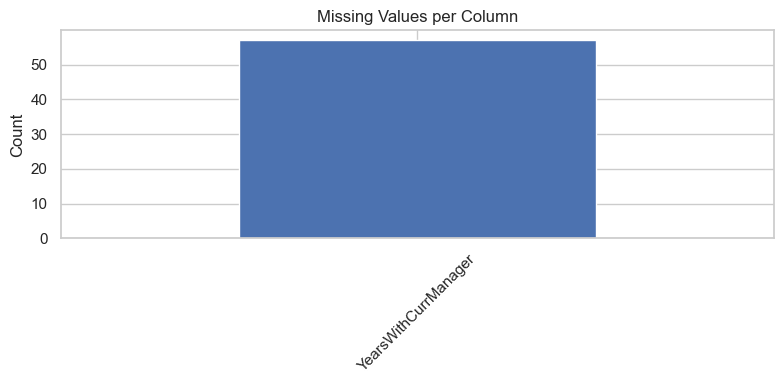

In [8]:
missing = df.isnull().sum()
missing = missing[missing > 0]

plot_missing_values(
    missing,
    save_path=FIG_DIR / "preprocess_missing_before.png"
)


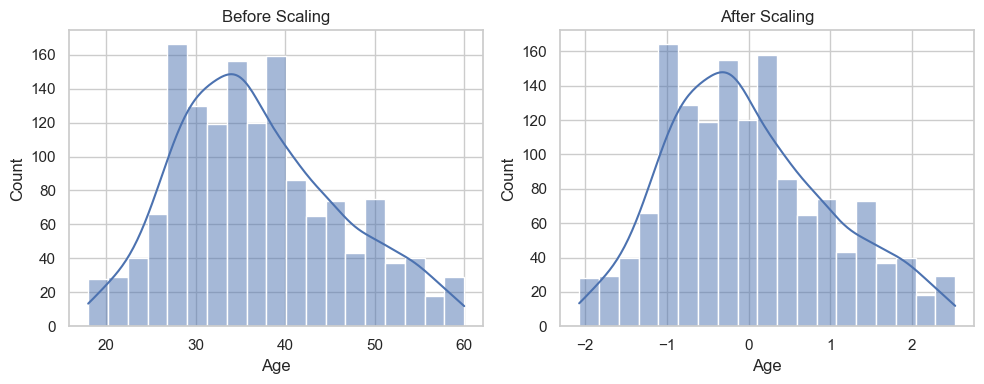

In [9]:
feature = feature_names[0]

plot_scaling_comparison(
    df,
    processed_df,
    feature,
    save_path=FIG_DIR / "preprocess_scaling_comparison.png"
)


## Nhận xét tiền xử lý

1. Missing values
- Dữ liệu gần như không có missing values nên không cần xử lý phức tạp.

2. Duplicate
- Các bản ghi trùng lặp đã được loại bỏ để tránh ảnh hưởng đến mô hình.

3. Encoding
- Các biến phân loại được chuyển thành dạng số bằng one-hot encoding
để mô hình học máy có thể xử lý.

4. Outlier
- Outlier được kiểm tra bằng IQR trong bước EDA.
- Các giá trị bất thường được xử lý trong pipeline để giảm nhiễu.

5. Scaling
- Các biến số được chuẩn hoá bằng StandardScaler
để đảm bảo các đặc trưng có cùng thang đo.
- Điều này giúp các mô hình như KMeans và Logistic Regression
hoạt động ổn định hơn.

Kết luận:
- Dữ liệu sau tiền xử lý đã sẵn sàng cho bước khai phá và mô hình hoá.
